# Problem Statement

An investor has approached my construction company; she thinks there is an opportunity in Ames, Iowa to buy,refurnish and sell houses or buy land and build from scratch. He'd like to know what the biggest predictors are of higher valued houses, and if location matters. If there is an opportunity, she'd like to work with my construction company to begin the work together. 

Luckily, there is a data set that can help us answer these questions! The data dictionary used in this data analysis can be found here: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt 

Our success can be validated if we are able to answer the following: 
1. Does location matter? 
2. What features correlated with higher selling houses? 
3. Where should we invest our time and money? On square footage? On overall quality? 

# Familiarity with data and data cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV,Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
filepath_train_data="./datasets/train.csv"
filepath_test_data="./datasets/test.csv"

df_train = pd.read_csv(filepath_train_data)
df_test = pd.read_csv(filepath_test_data) 

In [4]:
df_train.set_index("Id",inplace=True)
df_test.set_index("Id",inplace=True)

In [5]:
df_train.shape

(2051, 80)

In [6]:
df_test.shape

(878, 79)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2

In [8]:
df_train.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [9]:
df_train.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 2658 to 1939
Data columns (total 79 columns):
PID                878 non-null int64
MS SubClass        878 non-null int64
MS Zoning          878 non-null object
Lot Frontage       718 non-null float64
Lot Area           878 non-null int64
Street             878 non-null object
Alley              58 non-null object
Lot Shape          878 non-null object
Land Contour       878 non-null object
Utilities          878 non-null object
Lot Config         878 non-null object
Land Slope         878 non-null object
Neighborhood       878 non-null object
Condition 1        878 non-null object
Condition 2        878 non-null object
Bldg Type          878 non-null object
House Style        878 non-null object
Overall Qual       878 non-null int64
Overall Cond       878 non-null int64
Year Built         878 non-null int64
Year Remod/Add     878 non-null int64
Roof Style         878 non-null object
Roof Matl          878 non-null object
E

In [11]:
df_test.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,833.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,441.328018,53.896355,539.133257,1034.357631,1145.787016,348.398633,2.728929,1496.914579,0.439636,0.055809,1.539863,0.398633,2.879271,1.047836,6.454442,0.618451,1976.759904,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,438.457329,178.632355,426.172161,413.446291,375.264111,432.985566,32.572548,506.468967,0.529948,0.229683,0.559060,0.505927,0.830712,0.223966,1.596632,0.669571,25.689763,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,789.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,0.000000,452.000000,975.000000,1063.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,734.750000,0.000000,780.000000,1247.000000,1358.000000,720.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,2630.000000,2674.000000,2065.000000,481.000000,4476.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [12]:
df_train.isnull().sum().sort_values(ascending=False)[:30]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Qual        114
Garage Finish      114
Garage Cond        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Year Built           0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
dtype: int64

In [13]:
df_test.isnull().sum().sort_values(ascending=False)[:30]

Pool QC           874
Misc Feature      837
Alley             820
Fence             706
Fireplace Qu      422
Lot Frontage      160
Garage Cond        45
Garage Qual        45
Garage Yr Blt      45
Garage Finish      45
Garage Type        44
BsmtFin Type 1     25
Bsmt Exposure      25
Bsmt Qual          25
Bsmt Cond          25
BsmtFin Type 2     25
Mas Vnr Area        1
Electrical          1
Mas Vnr Type        1
Year Built          0
Exter Qual          0
Exter Cond          0
Foundation          0
Exterior 2nd        0
Exterior 1st        0
Roof Matl           0
Roof Style          0
Year Remod/Add      0
Sale Type           0
Overall Cond        0
dtype: int64

Columns have NaN in them that aren't meant to be a number. 

The following should be NA from the data dictionary:

- Alley (Nominal) 
- Bsmt Qual (Ordinal)
- Bsmt Cond (Ordinal)
- Bsmt Exposure	(Ordinal)
- BsmtFin Type 1
- BsmtFinType 2
- FireplaceQu
- Garage Type (Nominal)
- Garage Finish (Ordinal)	
- Garage Qual (Ordinal)
- Garage Cond (Ordinal):
- Pool QC (Ordinal):
- Fence (Ordinal):
- Misc Feature (Nominal)

In [14]:
cols_na= ["Alley","Bsmt Qual","Bsmt Cond","Bsmt Exposure","BsmtFin Type 1","BsmtFin Type 2","Fireplace Qu","Garage Type","Garage Finish","Garage Qual","Garage Cond","Pool QC","Fence","Misc Feature"]

[df_train[cols].fillna("NA",inplace=True) for cols in cols_na]
[df_test[cols].fillna("NA",inplace=True) for cols in cols_na]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [15]:
#Mas Vnr Type has None and NaN 
df_train["Mas Vnr Type"].fillna("None",inplace=True) 
df_test["Mas Vnr Type"].fillna("None",inplace=True)

In [16]:
#replace not a number with 0 
df_train["Mas Vnr Area"].fillna(0 ,inplace=True) 
df_test["Mas Vnr Area"].fillna(0 ,inplace=True)

We can use the median or mean for NaN values, there isn't a big difference between these numbers 

In [17]:
df_train["Lot Frontage"].median()

68.0

In [18]:
df_train["Lot Frontage"].fillna(69.05520046484602 ,inplace=True) 
df_test["Lot Frontage"].fillna(69.05520046484602 ,inplace=True)
#mean and median are similar here

In [19]:
{final: df_train[final].isnull().sum() for final in df_train.columns if df_train[final].isnull().sum() > 0}

{'BsmtFin SF 1': 1,
 'BsmtFin SF 2': 1,
 'Bsmt Unf SF': 1,
 'Total Bsmt SF': 1,
 'Bsmt Full Bath': 2,
 'Bsmt Half Bath': 2,
 'Garage Yr Blt': 114,
 'Garage Cars': 1,
 'Garage Area': 1}

In [20]:
df_train["Garage Yr Blt"].median()

1980.0

In [21]:
df_train["Garage Yr Blt"].fillna(1978.7077955601446 ,inplace=True) 
df_test["Garage Yr Blt"].fillna(1978.7077955601446 ,inplace=True)
#mean and median are similar here

In [22]:
{final: df_train[final].isnull().sum() for final in df_train.columns if df_train[final].isnull().sum() > 0}

{'BsmtFin SF 1': 1,
 'BsmtFin SF 2': 1,
 'Bsmt Unf SF': 1,
 'Total Bsmt SF': 1,
 'Bsmt Full Bath': 2,
 'Bsmt Half Bath': 2,
 'Garage Cars': 1,
 'Garage Area': 1}

In [23]:
#drop the rest of the null values here: only one or two of them 
df_train["BsmtFin SF 1"].dropna(inplace=True) 
df_test["BsmtFin SF 1"].dropna(inplace=True)

In [24]:
df_train["Bsmt Unf SF"].dropna(inplace=True) 
df_test["Bsmt Unf SF"].dropna(inplace=True)

In [25]:
df_train["BsmtFin SF 2"].dropna(inplace=True) 
df_test["BsmtFin SF 2"].dropna(inplace=True)

In [26]:
df_train["Total Bsmt SF"].dropna(inplace=True) 
df_test["Total Bsmt SF"].dropna(inplace=True)

In [27]:
df_train["Bsmt Full Bath"].dropna(inplace=True) 
df_test["Bsmt Full Bath"].dropna(inplace=True)

In [28]:
df_train["Bsmt Half Bath"].dropna(inplace=True) 
df_test["Bsmt Half Bath"].dropna(inplace=True)

In [29]:
df_train["Garage Cars"].dropna(inplace=True) 
df_test["Garage Cars"].dropna(inplace=True)

In [30]:
df_train["Garage Area"].dropna(inplace=True) 
df_test["Garage Area"].dropna(inplace=True)

In [31]:
{final: df_train[final].isnull().sum() for final in df_train.columns if df_train[final].isnull().sum() > 0}

{}

In [32]:
{final: df_test[final].isnull().sum() for final in df_train.columns if df_train[final].isnull().sum() > 0}

{}

In [33]:
#rename our colmns 
def clean(df):
    df.columns=df.columns.str.lower().str.replace("/ ","_").str.replace(" ","_")
    return df 

In [34]:
df_train=clean(df_train)

In [35]:
df_test=clean(df_test)

In [36]:
#I am converting ordinal columns here to check if they have an impact on saleprice 
conv_dict={'Ex':1.0,'Gd':2.0,'TA':3.0,'Fa':4.0,"Po":5.0,"NA":6.0}
df_train["fireplace_qu"]=df_train["fireplace_qu"].apply(conv_dict.get)

In [37]:
conv_dict_garage={'Ex':1.0,'Gd':2.0,'TA':3.0,'Fa':4.0,"Po":5.0,"NA":6.0}
df_train["garage_qual"]=df_train["garage_qual"].apply(conv_dict_garage.get)

In [38]:
df_test["garage_qual"]=df_test["garage_qual"].apply(conv_dict_garage.get)

In [39]:
df_test["fireplace_qu"]=df_test["fireplace_qu"].apply(conv_dict.get)

In [40]:
conv_dict_exter={'Ex':1.0,'Gd':2.0,'TA':3.0,'Fa':4.0,"Po":5.0}
df_train["exter_qual"]=df_train["exter_qual"].apply(conv_dict_exter.get)

In [41]:
df_test["exter_qual"]=df_test["exter_qual"].apply(conv_dict_exter.get)

In [42]:
conv_dict_bsmt_qual={'Ex':1.0,'Gd':2.0,'TA':3.0,'Fa':4.0,"Po":5.0,"NA":6.0}
df_train["bsmt_qual"]=df_train["bsmt_qual"].apply(conv_dict_bsmt_qual.get)

In [43]:
df_test["bsmt_qual"]=df_test["bsmt_qual"].apply(conv_dict_bsmt_qual.get)

In [44]:
conv_dict_electrical={'SBrkr':1.0,'FuseA':2.0,'FuseF':3.0,'FuseP':4.0,"Mix":5.0}
df_train["electrical"]=df_train["electrical"].apply(conv_dict_electrical.get)

In [45]:
df_test["electrical"]=df_test["electrical"].apply(conv_dict_electrical.get)

In [46]:
conv_dict_functional={'Typ':1.0,'Min1':2.0,'Min2':3.0,'Mod':4.0,"Maj1":5.0,"Maj2":6.0,"Sev":7.0,"Sal":8.0}
df_train["functional"]=df_train["functional"].apply(conv_dict_functional.get)

In [47]:
df_test["functional"]=df_test["functional"].apply(conv_dict_functional.get)

In [48]:
conv_dict_kitchen={'Ex':1.0,'Gd':2.0,'TA':3.0,'Fa':4.0,"Po":5.0}
df_train["kitchen_qual"]=df_train["kitchen_qual"].apply(conv_dict_kitchen.get)

In [49]:
df_test["kitchen_qual"]=df_test["kitchen_qual"].apply(conv_dict_kitchen.get)

# EDA

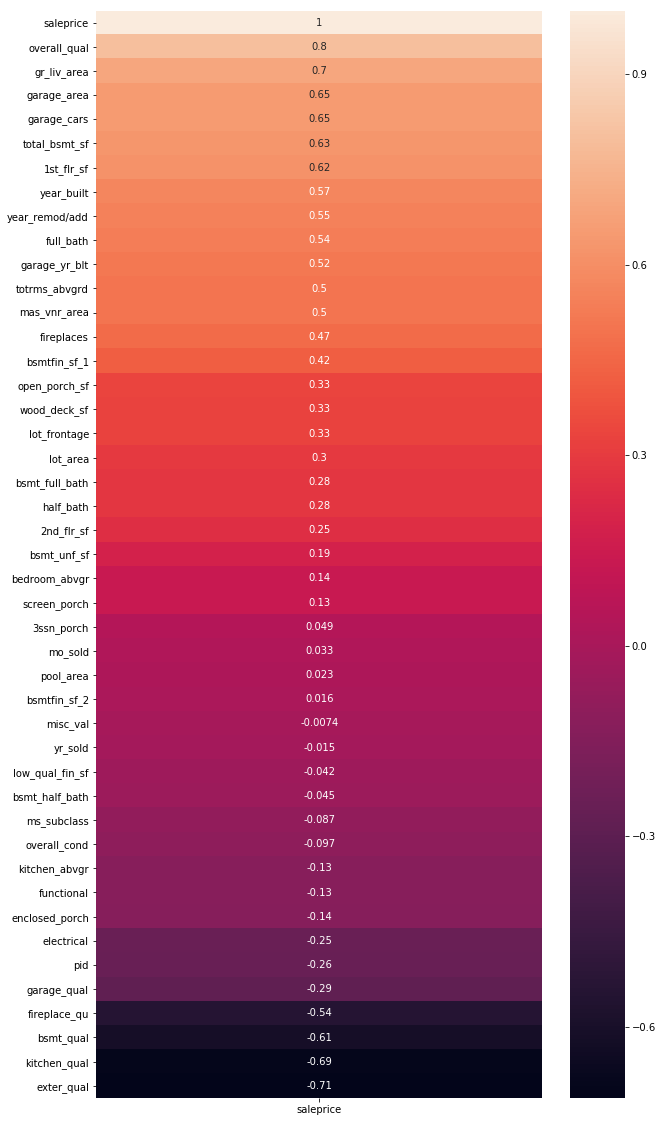

In [50]:
plt.figure(figsize=(10,20))
sns.heatmap(df_train.corr()[["saleprice"]].sort_values(by="saleprice",ascending=False), annot=True)

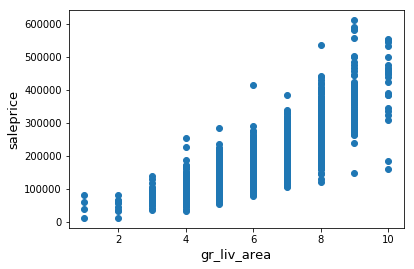

In [51]:
fig,ax=plt.subplots()
ax.scatter(x=df_train["overall_qual"], y=df_train["saleprice"])
plt.ylabel('saleprice', fontsize=13)
plt.xlabel('gr_liv_area', fontsize=13)
plt.show()

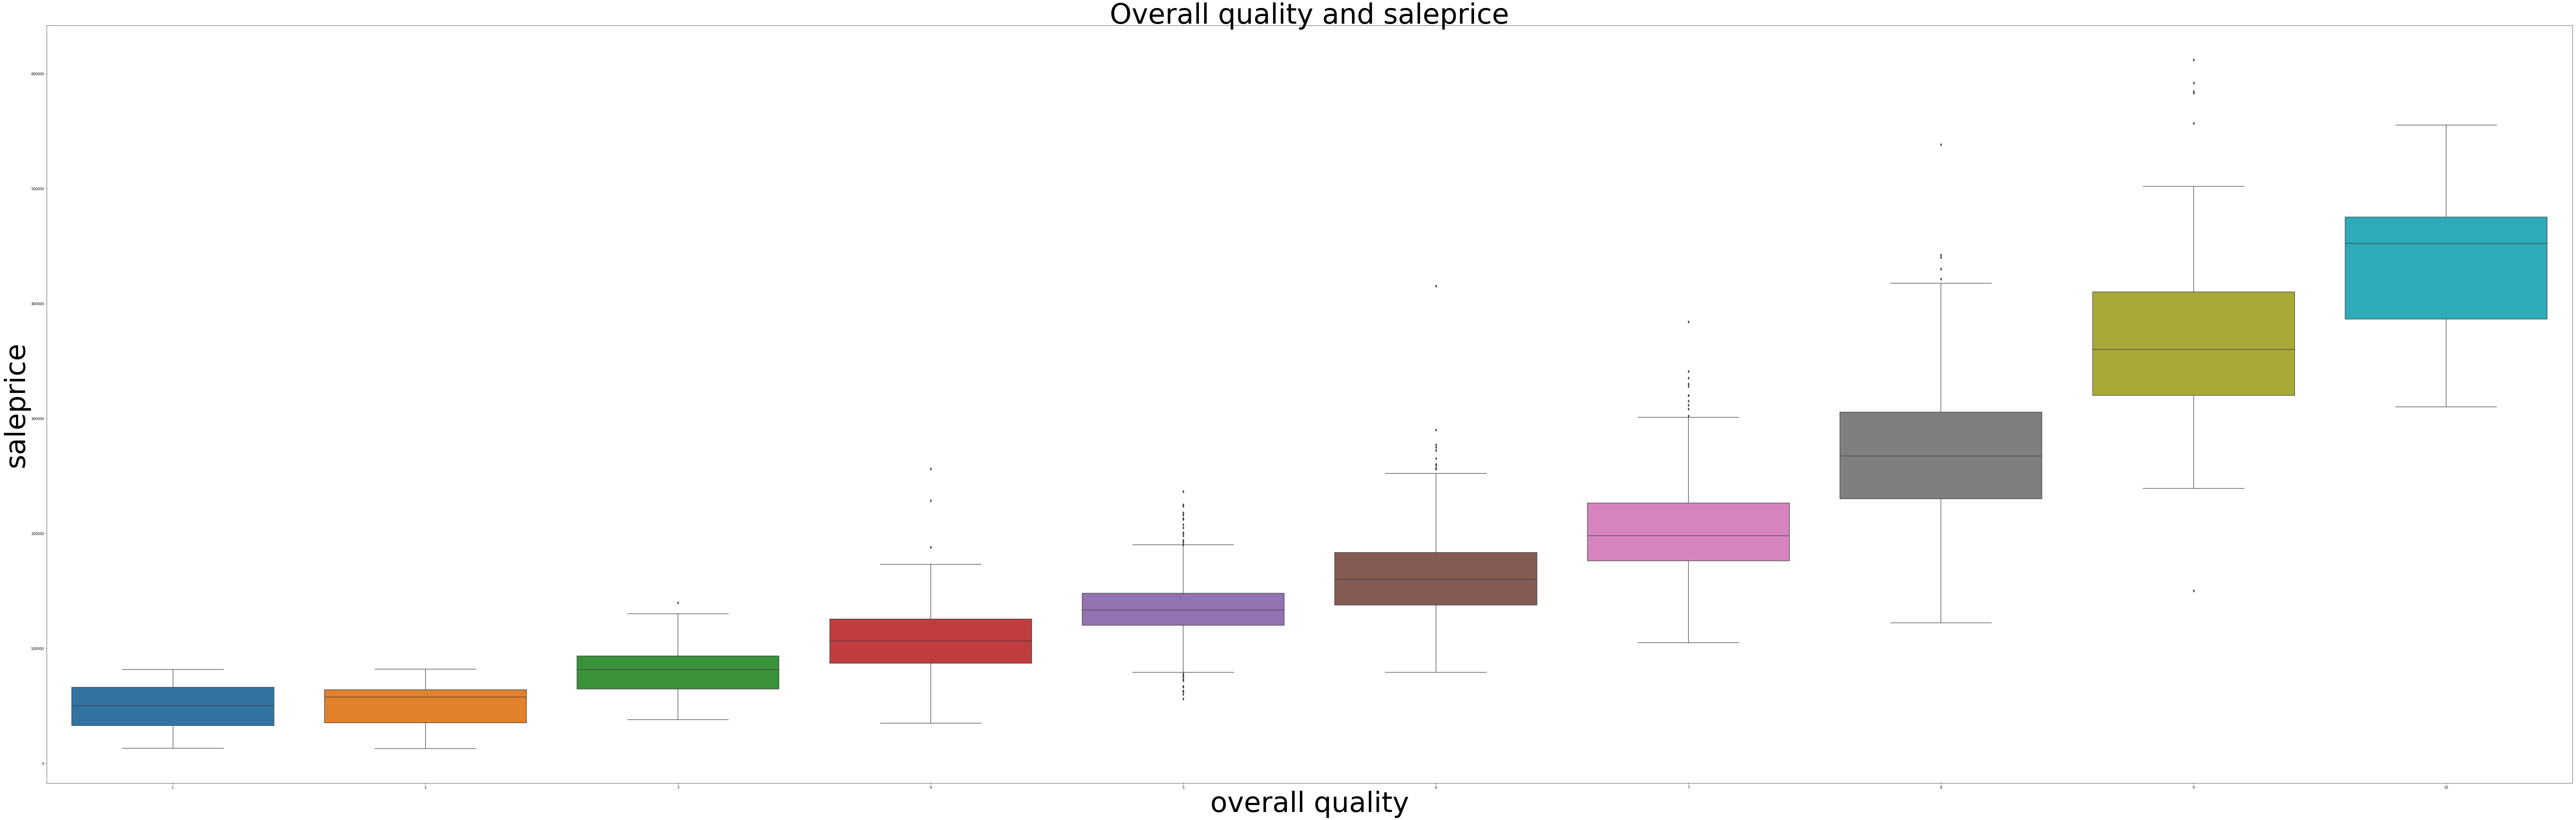

In [215]:
plt.figure(figsize=(130,40))
ax= sns.boxplot(df_train["overall_qual"],df_train["saleprice"])
# We see an increase in sale price related to overall quality

ax.set_title('Overall quality and saleprice', size = 80);
ax.set_ylabel('saleprice', size = 80);
ax.set_xlabel('overall quality', size = 80);

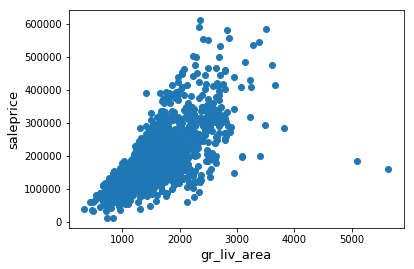

In [53]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['gr_liv_area'], y = df_train['saleprice'])
plt.ylabel('saleprice', fontsize=13)
plt.xlabel('gr_liv_area', fontsize=13)
plt.show()
# We see an increase in sale price related to above ground living area 

In [54]:
df_train[(df_train["gr_liv_area"]>4000)]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1499,908154235,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,1.0,TA,PConc,1.0,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,1.0,4692,950,0,5642,2.0,0.0,2,1,3,1,1.0,12,1.0,3,2.0,Attchd,2008.0,Fin,2.0,1418.0,3.0,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,160000
2181,908154195,20,RL,128.0,39290,Pave,NA,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,1.0,TA,PConc,1.0,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,1.0,5095,0,0,5095,1.0,1.0,2,1,2,1,1.0,15,1.0,2,2.0,Attchd,2008.0,Fin,3.0,1154.0,3.0,TA,Y,546,484,0,0,0,0,NA,NA,Elev,17000,10,2007,New,183850


In [55]:
df_train=df_train.drop(df_train[(df_train["gr_liv_area"]>4000)].index)
#Get rid of outliers here 

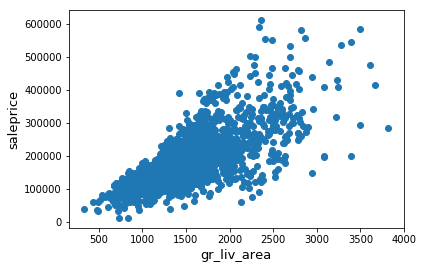

In [56]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['gr_liv_area'], y = df_train['saleprice'])
plt.ylabel('saleprice', fontsize=13)
plt.xlabel('gr_liv_area', fontsize=13)
plt.show()
#Visualize what this looks like without outliers 

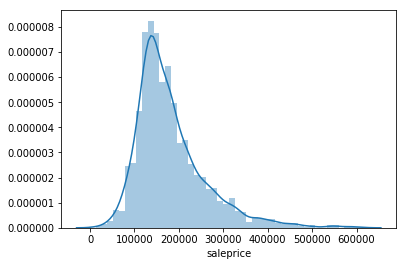

In [57]:
sns.distplot(df_train["saleprice"])

In [58]:
{final: df_train[final].isnull().mean()*100 for final in df_train.columns if df_train[final].isnull().mean() > 0}

{'bsmtfin_sf_1': 0.04880429477794046,
 'bsmtfin_sf_2': 0.04880429477794046,
 'bsmt_unf_sf': 0.04880429477794046,
 'total_bsmt_sf': 0.04880429477794046,
 'bsmt_full_bath': 0.09760858955588092,
 'bsmt_half_bath': 0.09760858955588092,
 'garage_cars': 0.04880429477794046,
 'garage_area': 0.04880429477794046}

In [59]:
df_train.columns

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish'

In [210]:
plt.figure(figsize=(100,30))
ax= sns.barplot(x=df_train['neighborhood'],y=df_train['saleprice'])
ax.set_title('House Style by Saleprice', size = 50);
ax.set_ylabel('Price', size = 50);
ax.set_xlabel('Neighborhood', size = 50);

KeyError: 'neighborhood'

<Figure size 7200x2160 with 0 Axes>

In [61]:
df_train.groupby("neighborhood").mean()["saleprice"].sort_values(ascending=False)
#neighborhood has an impact on price
# let's dummy this!
#A true hypothesis test would be helpful here 

neighborhood
StoneBr    329675.736842
NridgHt    322831.352459
NoRidge    316294.125000
GrnHill    280000.000000
Veenker    253570.588235
Timber     241051.354167
Somerst    227183.900000
ClearCr    217490.074074
Crawfor    205901.211268
CollgCr    202497.216667
Blmngtn    200417.681818
NWAmes     194619.022989
Gilbert    189228.387931
Greens     188666.666667
SawyerW    187760.160920
Mitchel    167656.707317
NAmes      145905.816129
Blueste    144566.666667
NPkVill    140476.470588
Sawyer     137181.909910
Landmrk    137000.000000
SWISU      134758.875000
Edwards    129905.787234
BrkSide    127022.697368
OldTown    125276.300613
BrDale     103371.052632
IDOTRR     101103.188406
MeadowV    100231.250000
Name: saleprice, dtype: float64

In [147]:
foo['House Style'].unique()

array(['2Story', '1Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin',
       '1.5Unf'], dtype=object)

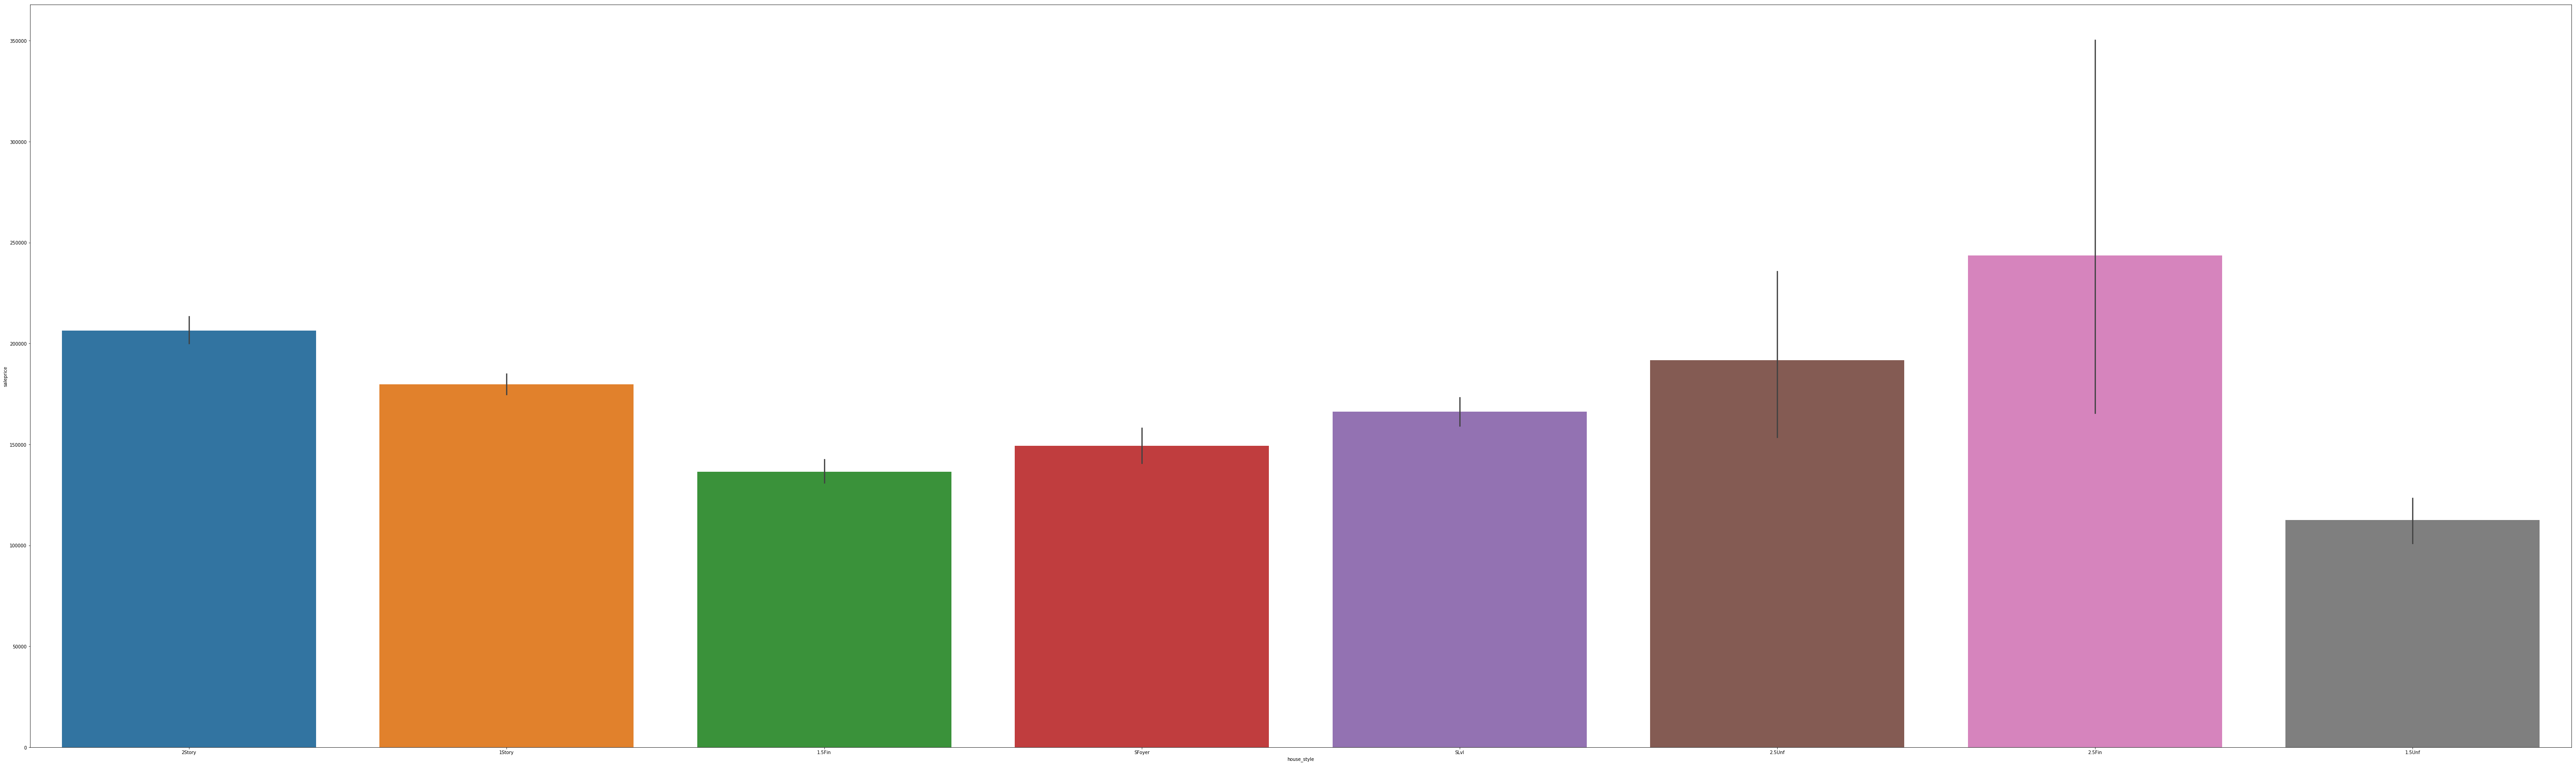

In [62]:
plt.figure(figsize=(100,30))
sns.barplot(x=df_train['house_style'],y=df_train['saleprice'])


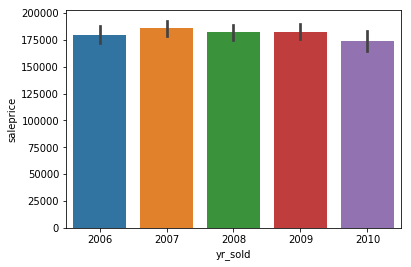

In [63]:
sns.barplot(x=df_train["yr_sold"],y=df_train['saleprice'])
#year sold doesn't look like it has a huge impact

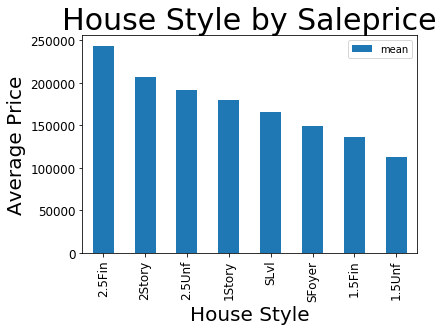

In [214]:
#check columns to see if there is a big difference in saleprice 
ax = foo.groupby("House Style")["SalePrice"].agg([np.mean]).sort_values(by="mean", ascending=False).plot(kind = 'bar')
ax.set_title('House Style by Saleprice', size = 30);
ax.set_ylabel('Average Price', size = 20);
ax.set_xlabel('House Style', size = 20);
ax.tick_params(labelsize = 'large')

# plt.title('title', size = 10);
# plt.ylabel('ylabel', size = 10);
# plt.xlabel('xlabel', size = 10);
# plt.yticks(size = 10);
# plt.xticks(size = 10);
# foo.groupby("House Style")["SalePrice"].agg([np.mean]).sort_values(by="mean", ascending=False).plot(kind = 'bar')

In [64]:
#check columns to see if there is a big difference in saleprice 
df_train.groupby("house_style")["saleprice"].agg([np.mean,np.std]).sort_values(by="mean", ascending=False)

,mean,std
house_style,,
2.5Fin,243666.666667,128464.262216
2Story,206486.700168,82287.404043
2.5Unf,191785.714286,87041.483100
1Story,179805.375236,81763.702077
SLvl,166248.989362,37262.422556
SFoyer,149343.920000,31859.449693
1.5Fin,136480.091743,44910.975892
1.5Unf,112466.666667,21111.364166


In [65]:
#check columns to see if there is a big difference in saleprice 
df_train.groupby("neighborhood")["saleprice"].agg([np.mean,np.std]).sort_values(by="mean", ascending=False)

,mean,std
neighborhood,,
StoneBr,329675.736842,128597.738212
NridgHt,322831.352459,92964.835768
NoRidge,316294.125000,67015.947652
GrnHill,280000.000000,70710.678119
Veenker,253570.588235,69147.647869
Timber,241051.354167,70247.203305
Somerst,227183.900000,55518.617822
ClearCr,217490.074074,53479.942309
Crawfor,205901.211268,60856.738509


In [66]:
df_train.groupby("neighborhood").mean()["saleprice"].sort_values(ascending=False)

neighborhood
StoneBr    329675.736842
NridgHt    322831.352459
NoRidge    316294.125000
GrnHill    280000.000000
Veenker    253570.588235
Timber     241051.354167
Somerst    227183.900000
ClearCr    217490.074074
Crawfor    205901.211268
CollgCr    202497.216667
Blmngtn    200417.681818
NWAmes     194619.022989
Gilbert    189228.387931
Greens     188666.666667
SawyerW    187760.160920
Mitchel    167656.707317
NAmes      145905.816129
Blueste    144566.666667
NPkVill    140476.470588
Sawyer     137181.909910
Landmrk    137000.000000
SWISU      134758.875000
Edwards    129905.787234
BrkSide    127022.697368
OldTown    125276.300613
BrDale     103371.052632
IDOTRR     101103.188406
MeadowV    100231.250000
Name: saleprice, dtype: float64

In [67]:
df_train.groupby("kitchen_qual")["saleprice"].agg([np.mean,np.std]).sort_values(by="mean", ascending=False)

,mean,std
kitchen_qual,,
1.0,338632.510067,101230.223568
2.0,211629.451613,63278.150480
3.0,139501.607450,37832.983986
4.0,101334.957447,41957.590989


In [68]:
df_train.groupby("functional")["saleprice"].agg([np.mean,np.std]).sort_values(by="mean", ascending=False)

,mean,std
functional,,
1.0,183967.326189,79709.491616
5.0,163106.166667,54563.184907
2.0,154429.761905,48195.569336
3.0,150424.571429,52177.996640
4.0,148108.724138,92052.265979
7.0,95750.000000,47022.600949
6.0,87157.714286,37181.726469
8.0,31550.000000,26092.240226


In [69]:
df_train.groupby("misc_feature")["saleprice"].agg([np.mean,np.std]).sort_values(by="mean", ascending=False)

,mean,std
misc_feature,,
TenC,250000.000000,NaN
NA,182175.624685,79959.806456
Othr,163166.666667,98750.105485
Shed,159042.732143,48268.869093
Gar2,146500.000000,41876.803444


In [70]:
df_train.groupby("fireplace_qu")["saleprice"].agg([np.mean,np.std,np.median]).sort_values(by="mean", ascending=False)

,mean,std,median
fireplace_qu,,,
1.0,331481.483871,104195.432710,320000
2.0,233815.061420,96582.400975,214000
3.0,204893.621622,62478.226103,188500
4.0,170287.203390,36515.654145,159500
6.0,142001.103000,45290.312181,136500
5.0,139263.967742,26441.825858,139000


In [71]:
df_train.columns[:100]

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish'

In [72]:
df_train.columns

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish'

In [73]:
df_train.dropna(inplace=True)

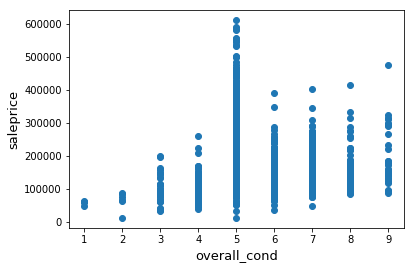

In [74]:
#overall_cond
fig, ax = plt.subplots()
ax.scatter(x = df_train['overall_cond'], y = df_train['saleprice'])
plt.ylabel('saleprice', fontsize=13)
plt.xlabel('overall_cond', fontsize=13)
plt.show()

# Dummy Variables and Feature Engineering

In [75]:
#ID in data dictionary anything that has square feet 
# I attempted to add square footage up here to see if this made a difference, and it didn't 
# df_train["total_square_feet_below_ground"]=  df_train["total_bsmt_sf"] + df_train["1st_flr_sf"] + df_train["2nd_flr_sf"] + df_train["pool_area"]+df_train["mas_vnr_area"]+df_train["garage_area"]+df_train["lot_area"]+df_train["wood_deck_sf"]+df_train["open_porch_sf"]+df_train["enclosed_porch"]+df_train["3ssn_porch"]+df_train["screen_porch"]

In [76]:
# df_train["over_all_qual_and_cond"]= df_train["overall_qual"] * df_train["overall_cond"]
#attempted feature engineering with quality and condition, also did not have an impact

In [77]:
# fig, ax = plt.subplots()
# ax.scatter(x = df_train["saleprice"], y = df_train['over_all_qual_and_cond'])
# plt.ylabel('over_all_qual_and_cond', fontsize=13)
# plt.xlabel("saleprice", fontsize=13)
# plt.show()

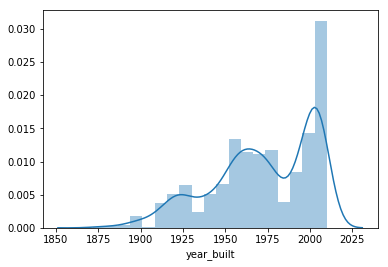

In [78]:
sns.distplot(df_train["year_built"])

In [79]:
df_train["year_built"].value_counts().sort_values(ascending=False)

2005    102
2006     99
2007     78
2004     72
2003     64
       ... 
1885      1
1892      1
1879      1
1875      1
1872      1
Name: year_built, Length: 113, dtype: int64

In [80]:
df_train = pd.get_dummies(df_train, columns=['neighborhood'], drop_first=True)
#since location is important after looking at the median and mean prices based off of neighborhood, dummy neighborhood! 

In [81]:
df_test = pd.get_dummies(df_test, columns=['neighborhood'], drop_first=True)

In [82]:
df_train = pd.get_dummies(df_train, columns=['house_style'], drop_first=True)

In [83]:
neighborhoods_test= [column for column in df_test.columns if "neighborhood" in column ]

In [84]:
neighborhoods= [column for column in df_train.columns if "neighborhood" in column ]

In [85]:
# df_train = pd.get_dummies(df_train, columns=['central_air'], drop_first=True)

In [86]:
# central_air_test= [column for column in df_train.columns if "central_air" in column ]

In [87]:
df_test = pd.get_dummies(df_test, columns=['house_style'], drop_first=True)


In [88]:
df_test.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,condition_1,condition_2,bldg_type,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,...,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0000,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,2fmCon,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3.0,Fa,Stone,4.0,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,4.0,908,1020,0,1928,0,0,2,0,4,...,1,440,5.0,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2718,905108090,90,RL,69.0552,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,Duplex,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3.0,TA,CBlock,2.0,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,1.0,1967,0,0,1967,0,0,2,0,6,...,2,580,3.0,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2414,528218130,60,RL,58.0000,17104,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,TA,PConc,2.0,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,1.0,664,832,0,1496,1,0,2,1,3,...,2,426,3.0,TA,Y,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1989,902207150,30,RM,60.0000,8520,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,2.0,TA,CBlock,3.0,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,1.0,968,0,0,968,0,0,1,0,2,...,2,480,4.0,TA,N,0,0,184,0,0,0,NA,NA,NA,0,7,2007,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
625,535105100,20,RL,69.0552,9500,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3.0,TA,CBlock,2.0,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,1.0,1394,0,0,1394,1,0,1,1,3,...,2,514,3.0,TA,Y,0,76,0,0,185,0,NA,NA,NA,0,7,2009,WD,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [89]:
house_style_test= [column for column in df_train.columns if "house_style" in column ]
#dummy house style to see if this makes a difference 

Time to reduce multicollinearity with polynomial features! 

## PolynomialFeatures

In [173]:
# Instantiate PolynomialFeatures object to create all two-way terms.
features_to_poly= ["mas_vnr_area","exter_qual","bsmtfin_sf_1","year_built","total_bsmt_sf","gr_liv_area","garage_cars","garage_area","overall_qual","overall_cond","garage_qual","kitchen_qual","kitchen_abvgr","full_bath","year_remod/add","fireplaces","bsmt_qual"] 
df_train2 = df_train[features_to_poly] 

polynomial_features = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
poly_train = polynomial_features.fit_transform(df_train2)

In [174]:
# Transform into a dataframe
poly_train = pd.DataFrame(poly_train, columns = polynomial_features.get_feature_names(df_train2.columns), index=df_train2.index)
poly_train.head()

,mas_vnr_area,exter_qual,bsmtfin_sf_1,year_built,total_bsmt_sf,gr_liv_area,garage_cars,garage_area,overall_qual,overall_cond,garage_qual,kitchen_qual,kitchen_abvgr,full_bath,year_remod/add,fireplaces,bsmt_qual,mas_vnr_area^2,mas_vnr_area exter_qual,mas_vnr_area bsmtfin_sf_1,mas_vnr_area year_built,mas_vnr_area total_bsmt_sf,mas_vnr_area gr_liv_area,mas_vnr_area garage_cars,mas_vnr_area garage_area,mas_vnr_area overall_qual,mas_vnr_area overall_cond,mas_vnr_area garage_qual,mas_vnr_area kitchen_qual,mas_vnr_area kitchen_abvgr,mas_vnr_area full_bath,mas_vnr_area year_remod/add,mas_vnr_area fireplaces,mas_vnr_area bsmt_qual,exter_qual^2,exter_qual bsmtfin_sf_1,exter_qual year_built,exter_qual total_bsmt_sf,exter_qual gr_liv_area,exter_qual garage_cars,exter_qual garage_area,exter_qual overall_qual,exter_qual overall_cond,exter_qual garage_qual,exter_qual kitchen_qual,exter_qual kitchen_abvgr,exter_qual full_bath,exter_qual year_remod/add,exter_qual fireplaces,exter_qual bsmt_qual,...,garage_area kitchen_abvgr,garage_area full_bath,garage_area year_remod/add,garage_area fireplaces,garage_area bsmt_qual,overall_qual^2,overall_qual overall_cond,overall_qual garage_qual,overall_qual kitchen_qual,overall_qual kitchen_abvgr,overall_qual full_bath,overall_qual year_remod/add,overall_qual fireplaces,overall_qual bsmt_qual,overall_cond^2,overall_cond garage_qual,overall_cond kitchen_qual,overall_cond kitchen_abvgr,overall_cond full_bath,overall_cond year_remod/add,overall_cond fireplaces,overall_cond bsmt_qual,garage_qual^2,garage_qual kitchen_qual,garage_qual kitchen_abvgr,garage_qual full_bath,garage_qual year_remod/add,garage_qual fireplaces,garage_qual bsmt_qual,kitchen_qual^2,kitchen_qual kitchen_abvgr,kitchen_qual full_bath,kitchen_qual year_remod/add,kitchen_qual fireplaces,kitchen_qual bsmt_qual,kitchen_abvgr^2,kitchen_abvgr full_bath,kitchen_abvgr year_remod/add,kitchen_abvgr fireplaces,kitchen_abvgr bsmt_qual,full_bath^2,full_bath year_remod/add,full_bath fireplaces,full_bath bsmt_qual,year_remod/add^2,year_remod/add fireplaces,year_remod/add bsmt_qual,fireplaces^2,fireplaces bsmt_qual,bsmt_qual^2
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,289.0,2.0,533.0,1976.0,725.0,1479.0,2.0,475.0,6.0,8.0,3.0,2.0,1.0,2.0,2005.0,0.0,3.0,83521.0,578.0,154037.0,571064.0,209525.0,427431.0,578.0,137275.0,1734.0,2312.0,867.0,578.0,289.0,578.0,579445.0,0.0,867.0,4.0,1066.0,3952.0,1450.0,2958.0,4.0,950.0,12.0,16.0,6.0,4.0,2.0,4.0,4010.0,0.0,6.0,...,475.0,950.0,952375.0,0.0,1425.0,36.0,48.0,18.0,12.0,6.0,12.0,12030.0,0.0,18.0,64.0,24.0,16.0,8.0,16.0,16040.0,0.0,24.0,9.0,6.0,3.0,6.0,6015.0,0.0,9.0,4.0,2.0,4.0,4010.0,0.0,6.0,1.0,2.0,2005.0,0.0,3.0,4.0,4010.0,0.0,6.0,4020025.0,0.0,6015.0,0.0,0.0,9.0
544,132.0,2.0,637.0,1996.0,913.0,2122.0,2.0,559.0,7.0,5.0,3.0,2.0,1.0,2.0,1997.0,1.0,2.0,17424.0,264.0,84084.0,263472.0,120516.0,280104.0,264.0,73788.0,924.0,660.0,396.0,264.0,132.0,264.0,263604.0,132.0,264.0,4.0,1274.0,3992.0,1826.0,4244.0,4.0,1118.0,14.0,10.0,6.0,4.0,2.0,4.0,3994.0,2.0,4.0,...,559.0,1118.0,1116323.0,559.0,1118.0,49.0,35.0,21.0,14.0,7.0,14.0,13979.0,7.0,14.0,25.0,15.0,10.0,5.0,10.0,9985.0,5.0,10.0,9.0,6.0,3.0,6.0,5991.0,3.0,6.0,4.0,2.0,4.0,3994.0,2.0,4.0,1.0,2.0,1997.0,1.0,2.0,4.0,3994.0,2.0,4.0,3988009.0,1997.0,3994.0,1.0,2.0,4.0
153,0.0,3.0,731.0,1953.0,1057.0,1057.0,1.0,246.0,5.0,7.0,3.0,2.0,1.0,1.0,2007.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2193.0,5859.0,3171.0,3171.0,3.0,738.0,15.0,21.0,9.0,6.0,3.0,3.0,6021.0,0.0,9.0,...,246.0,246.0,493722.0,0.0,738.0,25.0,35.0,15.0,10.0,5.0,5.0,10035.0,0.0,15.0,49.0,21.0,14.0,7.0,7.0,14049.0,0.0,21.0,9.0,6.0,3.0,3.0,6021.0,0.0,9.0,4.0,2.0,2.0,4014.0,0.0,6.0,1.0,1.0,2007.0,0.0,3.0,1.0,2007.0,0.0,3.0,4028049.0,0.0,6021.0,0.0,0.0,9.0
318,0.0,3.0,0.0,2006.0,384.0,1444.0,2.0,400.0,5.0,5.0,3.0,3.0,1.0,2.0,2007.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,6018.

In [177]:
# Instantiate PolynomialFeatures object to create all two-way terms.
features_to_poly_test= ["mas_vnr_area","exter_qual","bsmtfin_sf_1","year_built","total_bsmt_sf","gr_liv_area","garage_cars","garage_area","overall_qual","overall_cond","garage_qual","kitchen_qual","kitchen_abvgr","full_bath","year_remod/add","fireplaces","bsmt_qual"]
df_test2 = df_test[features_to_poly_test] 

polynomial_features_test = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
poly_test = polynomial_features_test.fit_transform(df_test2)

In [178]:
# Transform into a dataframe
poly_test = pd.DataFrame(poly_test, columns = polynomial_features_test.get_feature_names(df_test2.columns), index=df_test2.index)

In [179]:
poly_test.head()

,mas_vnr_area,exter_qual,bsmtfin_sf_1,year_built,total_bsmt_sf,gr_liv_area,garage_cars,garage_area,overall_qual,overall_cond,garage_qual,kitchen_qual,kitchen_abvgr,full_bath,year_remod/add,fireplaces,bsmt_qual,mas_vnr_area^2,mas_vnr_area exter_qual,mas_vnr_area bsmtfin_sf_1,mas_vnr_area year_built,mas_vnr_area total_bsmt_sf,mas_vnr_area gr_liv_area,mas_vnr_area garage_cars,mas_vnr_area garage_area,mas_vnr_area overall_qual,mas_vnr_area overall_cond,mas_vnr_area garage_qual,mas_vnr_area kitchen_qual,mas_vnr_area kitchen_abvgr,mas_vnr_area full_bath,mas_vnr_area year_remod/add,mas_vnr_area fireplaces,mas_vnr_area bsmt_qual,exter_qual^2,exter_qual bsmtfin_sf_1,exter_qual year_built,exter_qual total_bsmt_sf,exter_qual gr_liv_area,exter_qual garage_cars,exter_qual garage_area,exter_qual overall_qual,exter_qual overall_cond,exter_qual garage_qual,exter_qual kitchen_qual,exter_qual kitchen_abvgr,exter_qual full_bath,exter_qual year_remod/add,exter_qual fireplaces,exter_qual bsmt_qual,...,garage_area kitchen_abvgr,garage_area full_bath,garage_area year_remod/add,garage_area fireplaces,garage_area bsmt_qual,overall_qual^2,overall_qual overall_cond,overall_qual garage_qual,overall_qual kitchen_qual,overall_qual kitchen_abvgr,overall_qual full_bath,overall_qual year_remod/add,overall_qual fireplaces,overall_qual bsmt_qual,overall_cond^2,overall_cond garage_qual,overall_cond kitchen_qual,overall_cond kitchen_abvgr,overall_cond full_bath,overall_cond year_remod/add,overall_cond fireplaces,overall_cond bsmt_qual,garage_qual^2,garage_qual kitchen_qual,garage_qual kitchen_abvgr,garage_qual full_bath,garage_qual year_remod/add,garage_qual fireplaces,garage_qual bsmt_qual,kitchen_qual^2,kitchen_qual kitchen_abvgr,kitchen_qual full_bath,kitchen_qual year_remod/add,kitchen_qual fireplaces,kitchen_qual bsmt_qual,kitchen_abvgr^2,kitchen_abvgr full_bath,kitchen_abvgr year_remod/add,kitchen_abvgr fireplaces,kitchen_abvgr bsmt_qual,full_bath^2,full_bath year_remod/add,full_bath fireplaces,full_bath bsmt_qual,year_remod/add^2,year_remod/add fireplaces,year_remod/add bsmt_qual,fireplaces^2,fireplaces bsmt_qual,bsmt_qual^2
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,0.0,3.0,0.0,1910.0,1020.0,1928.0,1.0,440.0,6.0,8.0,5.0,4.0,2.0,2.0,1950.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,5730.0,3060.0,5784.0,3.0,1320.0,18.0,24.0,15.0,12.0,6.0,6.0,5850.0,0.0,12.0,...,880.0,880.0,858000.0,0.0,1760.0,36.0,48.0,30.0,24.0,12.0,12.0,11700.0,0.0,24.0,64.0,40.0,32.0,16.0,16.0,15600.0,0.0,32.0,25.0,20.0,10.0,10.0,9750.0,0.0,20.0,16.0,8.0,8.0,7800.0,0.0,16.0,4.0,4.0,3900.0,0.0,8.0,4.0,3900.0,0.0,8.0,3802500.0,0.0,7800.0,0.0,0.0,16.0
2718,0.0,3.0,0.0,1977.0,1967.0,1967.0,2.0,580.0,5.0,4.0,3.0,3.0,2.0,2.0,1977.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,5931.0,5901.0,5901.0,6.0,1740.0,15.0,12.0,9.0,9.0,6.0,6.0,5931.0,0.0,6.0,...,1160.0,1160.0,1146660.0,0.0,1160.0,25.0,20.0,15.0,15.0,10.0,10.0,9885.0,0.0,10.0,16.0,12.0,12.0,8.0,8.0,7908.0,0.0,8.0,9.0,9.0,6.0,6.0,5931.0,0.0,6.0,9.0,6.0,6.0,5931.0,0.0,6.0,4.0,4.0,3954.0,0.0,4.0,4.0,3954.0,0.0,4.0,3908529.0,0.0,3954.0,0.0,0.0,4.0
2414,0.0,2.0,554.0,2006.0,654.0,1496.0,2.0,426.0,7.0,5.0,3.0,2.0,1.0,2.0,2006.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1108.0,4012.0,1308.0,2992.0,4.0,852.0,14.0,10.0,6.0,4.0,2.0,4.0,4012.0,2.0,4.0,...,426.0,852.0,854556.0,426.0,852.0,49.0,35.0,21.0,14.0,7.0,14.0,14042.0,7.0,14.0,25.0,15.0,10.0,5.0,10.0,10030.0,5.0,10.0,9.0,6.0,3.0,6.0,6018.0,3.0,6.0,4.0,2.0,4.0,4012.0,2.0,4.0,1.0,2.0,2006.0,1.0,2.0,4.0,4012.0,2.0,4.0,4024036.0,2006.0,4012.0,1.0,2.0,4.0
1989,0.0,2.0,0.0,1923.0,968.0,968.0,2.0,480.0,5.0,6.0,4.0,3.0,1.0,1.0,2006.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3846.0,1936.0,1936.0,4.0,960.0,10.0,12.0,8.0,6.0,2.0,2.0,4012.0,0.0,6.0,...,480.0,480.0,962880.0,0.0,1440.

In [181]:
poly_train['saleprice'] = df_train['saleprice']

In [182]:
poly_train.corr()[["saleprice"]].sort_values(by="saleprice",ascending=False)[:50]

,saleprice
saleprice,1.000000
gr_liv_area overall_qual,0.872834
overall_qual^2,0.831430
total_bsmt_sf overall_qual,0.830304
garage_area overall_qual,0.825545
garage_cars overall_qual,0.822633
total_bsmt_sf gr_liv_area,0.821746
year_built overall_qual,0.810988
overall_qual year_remod/add,0.808765
gr_liv_area garage_area,0.808590


In [183]:
poly_train.corr()[["saleprice"]].sort_values(by="saleprice",ascending=False)[-12:]

,saleprice
bsmt_qual,-0.618485
kitchen_qual^2,-0.655347
kitchen_qual bsmt_qual,-0.677047
exter_qual bsmt_qual,-0.680497
year_built kitchen_qual,-0.683951
exter_qual^2,-0.687739
kitchen_qual year_remod/add,-0.689565
kitchen_qual,-0.694157
exter_qual year_built,-0.706080
exter_qual year_remod/add,-0.709786


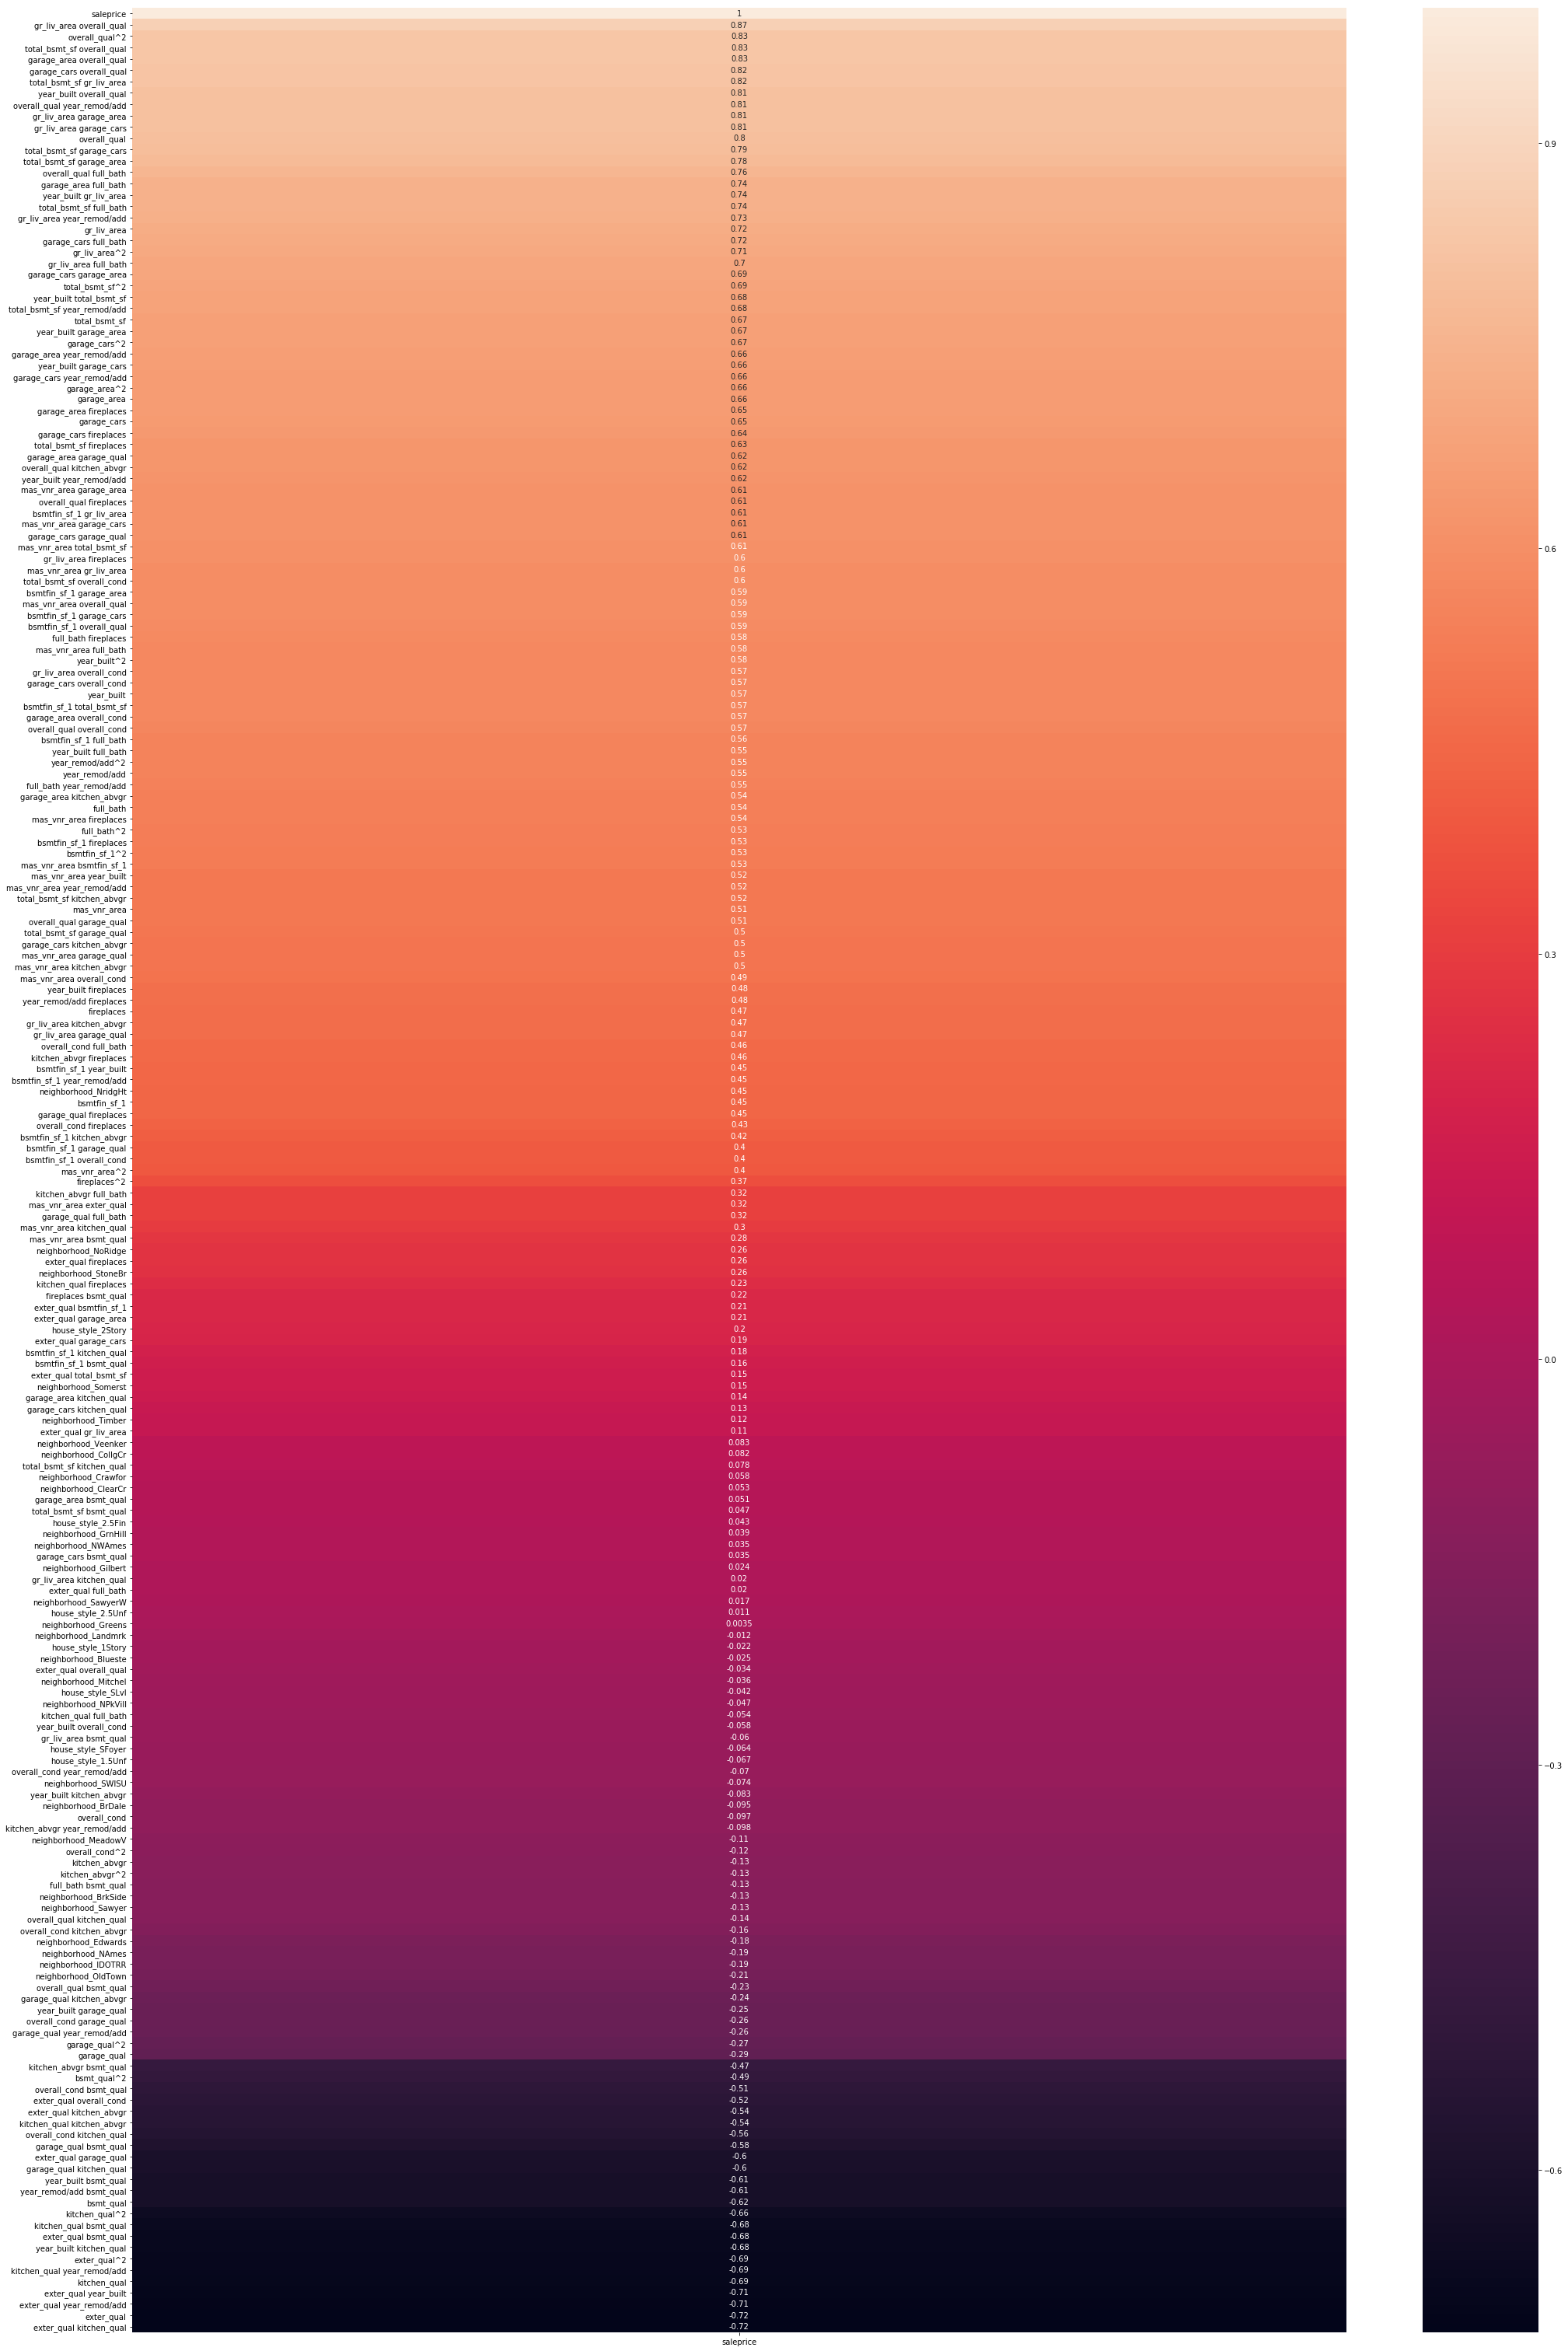

In [216]:
plt.figure(figsize=(35,55))
sns.heatmap(poly_train.corr()[["saleprice"]].sort_values(by="saleprice",ascending=False), annot=True)


In [185]:
# list comprehension to get all columns regarding neighborhood
neighborhoods= [col for col in df_train.columns if col.find('neighborhood') != -1]
# for each column in above list
for col in neighborhoods:
    # add those columns from df_train to poly_train
    poly_train[col] = df_train[col]
poly_train.columns

Index(['mas_vnr_area', 'exter_qual', 'bsmtfin_sf_1', 'year_built',
       'total_bsmt_sf', 'gr_liv_area', 'garage_cars', 'garage_area',
       'overall_qual', 'overall_cond',
       ...
       'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown',
       'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW',
       'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber',
       'neighborhood_Veenker'],
      dtype='object', length=198)

In [188]:
# list comprehension to get all columns regarding neighborhood
house_style = [col for col in df_train.columns if col.find('house_style') != -1]
# for each column in above list
for col in house_style:
    # add those columns from df_train to poly_train
    poly_train[col] = df_train[col]
poly_train.columns

Index(['mas_vnr_area', 'exter_qual', 'bsmtfin_sf_1', 'year_built',
       'total_bsmt_sf', 'gr_liv_area', 'garage_cars', 'garage_area',
       'overall_qual', 'overall_cond',
       ...
       'neighborhood_StoneBr', 'neighborhood_Timber', 'neighborhood_Veenker',
       'house_style_1.5Unf', 'house_style_1Story', 'house_style_2.5Fin',
       'house_style_2.5Unf', 'house_style_2Story', 'house_style_SFoyer',
       'house_style_SLvl'],
      dtype='object', length=205)

In [189]:
# list comprehension to get all columns regarding neighborhood
neighborhoods= [col for col in df_test.columns if col.find('neighborhood') != -1]
# for each column in above list
for col in neighborhoods:
    # add those columns from df_train to poly_train
    poly_test[col] = df_test[col]
poly_test.columns

Index(['mas_vnr_area', 'exter_qual', 'bsmtfin_sf_1', 'year_built',
       'total_bsmt_sf', 'gr_liv_area', 'garage_cars', 'garage_area',
       'overall_qual', 'overall_cond',
       ...
       'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown',
       'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW',
       'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber',
       'neighborhood_Veenker'],
      dtype='object', length=195)

In [190]:
# list comprehension to get all columns regarding neighborhood
house_style = [col for col in df_test.columns if col.find('house_style') != -1]
# for each column in above list
for col in house_style:
    # add those columns from df_train to poly_train
    poly_test[col] = df_test[col]
poly_test.columns

Index(['mas_vnr_area', 'exter_qual', 'bsmtfin_sf_1', 'year_built',
       'total_bsmt_sf', 'gr_liv_area', 'garage_cars', 'garage_area',
       'overall_qual', 'overall_cond',
       ...
       'neighborhood_StoneBr', 'neighborhood_Timber', 'neighborhood_Veenker',
       'house_style_1.5Unf', 'house_style_1Story', 'house_style_2.5Fin',
       'house_style_2.5Unf', 'house_style_2Story', 'house_style_SFoyer',
       'house_style_SLvl'],
      dtype='object', length=202)

In [191]:
features_for_corr= ["mas_vnr_area garage_area","year_built garage_area","garage_cars full_bath","year_remod/add bsmt_qual","exter_qual kitchen_qual","total_bsmt_sf full_bath","exter_qual^2","bsmt_qual^2","overall_cond bsmt_qual", "kitchen_qual kitchen_abvgr", "overall_cond kitchen_qual","garage_qual bsmt_qual",
"garage_qual kitchen_qual",
"year_remod/add bsmt_qual",
"bsmt_qual",
"kitchen_qual^2",
"kitchen_qual bsmt_qual",
"kitchen_qual year_remod/add",
"kitchen_qual",
"overall_qual^2",
"overall_qual year_remod/add",
"gr_liv_area garage_area",
"gr_liv_area garage_cars",
"overall_qual full_bath",
"garage_area full_bath",
"gr_liv_area year_remod/add",
"gr_liv_area",
"garage_cars full_bath",
"gr_liv_area^2",
"gr_liv_area full_bath",
"garage_cars garage_area",
"garage_cars^2",
"garage_area year_remod/add",
"garage_cars year_remod/add",
"garage_area^2",
"garage_area fireplaces",
"garage_cars",
"garage_cars fireplaces",
"garage_area garage_qual",
"overall_qual kitchen_abvgr",
"overall_qual fireplaces",
"garage_cars garage_qual",
"gr_liv_area fireplaces",
"full_bath fireplaces",
"gr_liv_area overall_cond",
"garage_cars overall_cond",
"garage_area overall_cond",
"overall_qual overall_cond",
"year_remod/add^2",
"year_remod/add",
"full_bath year_remod/add",
"garage_area kitchen_abvgr",
"full_bath",
"full_bath^2",
"overall_qual garage_qual", 'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
       'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor',
       'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_IDOTRR',
       'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes',
       'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge',
       'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU',
       'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst',
       'neighborhood_StoneBr', 'neighborhood_Timber', 'neighborhood_Veenker',
       'house_style_1.5Unf', 'house_style_1Story', 'house_style_2.5Fin',
       'house_style_2.5Unf', 'house_style_2Story', 'house_style_SFoyer',
       'house_style_SLvl']

In [192]:
len(features_for_corr) 

87

# Modeling

Linear Regression: Initially, I used the linear regression model here, this data (for the most part) follows the MLR assumptions, and we are predicting a continuous outcome (saleprice) as well as impact of features on saleprice. In order to prevent our data from being overfit, I've also used Lasso and Ridge. There isn't a significant difference between the scores. 

**From regression lab

SLR AND MLR:

- Linearity: Y must have an approximately linear relationship with each independent X_i.
- Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.
- Normality: The errors (residuals) follow a Normal distribution.
- Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)

MLR ONLY:
- Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j

Potential downfalls of this model are that it could be too simplistic - there are many factors that go into the sale price of a house that this model might not take into account, such as the economy. We also risk being overfit - not understanding what is truly important to the saleprice of the house.  

In [193]:
X = poly_train[features_for_corr]
y = poly_train["saleprice"]
#Did not train-test-split because we want to train our model with the most data we can -- advice from Matt during class. 

In [194]:
lr=LinearRegression()

In [195]:
cross_val_score(lr,X,y,cv=5).mean()

0.9028017670449788

In [196]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
lr.score(X,y)

0.917502831724478

In [198]:
def r2_adj(X,y): 
    lr= LinearRegression()
    model=lr.fit(X,y)
    r_squared=model.score(X,y)
    adjusted_r2_formula= 1 - (1 - r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r2_formula)

In [199]:
r2_adj(X,y)
#look at adjusted r2 as well to make sure we aren't including any "noise"

0.9138372272096821


In [121]:
df_train.shape

(2046, 112)

# Using Standard Scalar and Lasso 

In [122]:
#Use Lasso or Ridge to prevent data being overfit

In [200]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X)

In [201]:
r_alphas = np.logspace(0, 5, 100)

lasso_model = LassoCV(alphas=r_alphas, cv=5, max_iter=5000)

In [202]:
X.shape

(2046, 87)

In [203]:
lasso_model = lasso_model.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 582669072638.3341, tolerance: 1026379131.3038614
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 544605147966.0433, tolerance: 1026379131.3038614
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 395378066647.68225, tolerance: 1026379131.3038614
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You migh

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 495297793034.7826, tolerance: 1026379131.3038614
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492512885341.70355, tolerance: 1026379131.3038614
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 489868641328.56445, tolerance: 1026379131.3038614
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You mig

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418427397229.5484, tolerance: 1026379131.3038614
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 416461745708.5395, tolerance: 1026379131.3038614
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414594814138.5204, tolerance: 1026379131.3038614
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393993820325.8967, tolerance: 1026379131.3038614
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393828605841.25696, tolerance: 1026379131.3038614
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393673912847.4279, tolerance: 1026379131.3038614
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You migh

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 586223197909.2163, tolerance: 1040846919.4978042
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 581769162402.7863, tolerance: 1040846919.4978042
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 577521854959.7134, tolerance: 1040846919.4978042
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483806643224.5642, tolerance: 1040846919.4978042
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481157053389.80914, tolerance: 1040846919.4978042
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 478624184668.7238, tolerance: 1040846919.4978042
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You migh

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 447036059144.03436, tolerance: 1040846919.4978042
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446846995234.5989, tolerance: 1040846919.4978042
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446674190110.9151, tolerance: 1040846919.4978042
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You migh

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 531687577234.1199, tolerance: 1021743640.2429733
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 528740588532.81165, tolerance: 1021743640.2429733
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 525681018024.35406, tolerance: 1021743640.2429733
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You mig

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 454827249255.0539, tolerance: 1021743640.2429733
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452903384504.5856, tolerance: 1021743640.2429733
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451058341479.04285, tolerance: 1021743640.2429733
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You migh

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430452048346.29175, tolerance: 1021743640.2429733
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430249785756.48016, tolerance: 1021743640.2429733
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430055752185.4625, tolerance: 1021743640.2429733
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You mig

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 552323240337.9077, tolerance: 1052912602.9218336
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547720422403.188, tolerance: 1052912602.9218336
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 543407184081.2541, tolerance: 1052912602.9218336
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458096082390.57, tolerance: 1052912602.9218336
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455136867434.50903, tolerance: 1052912602.9218336
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452551578956.5508, tolerance: 1052912602.9218336
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418899137192.0438, tolerance: 1052912602.9218336
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418603415292.6495, tolerance: 1052912602.9218336
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418324717522.8002, tolerance: 1052912602.9218336
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 581754678419.4941, tolerance: 999854626.3533044
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 577574118417.3987, tolerance: 999854626.3533044
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 573023324656.07, tolerance: 999854626.3533044
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475333921920.7422, tolerance: 999854626.3533044
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472592196379.8074, tolerance: 999854626.3533044
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469239078161.73334, tolerance: 999854626.3533044
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might w

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414097742264.2191, tolerance: 999854626.3533044
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413421109231.51385, tolerance: 999854626.3533044
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 412803681795.809, tolerance: 999854626.3533044
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might wa

In [204]:
lasso_model.alpha_

73.90722033525779

In [205]:
print(lasso_model.score(X, y))
#not a significant difference in score between this and linear regression

0.9136632458213112


# Using Ridge

In [206]:
# Instantiate.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(X, y)

# Evaluate model using R2.
print(ridge_model.score(X, y))
#not a significant difference in score between this and linear regression

0.9164491948478326


# Kaggle Submission

In [130]:
X_kaggle = poly_test[features_for_corr]

In [131]:
X_kaggle['saleprice'] = ridge_model.predict(X_kaggle)
X_kaggle.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,year_built garage_area,garage_cars full_bath,year_remod/add bsmt_qual,exter_qual kitchen_qual,total_bsmt_sf full_bath,exter_qual^2,bsmt_qual^2,overall_cond bsmt_qual,kitchen_qual kitchen_abvgr,overall_cond kitchen_qual,garage_qual bsmt_qual,garage_qual kitchen_qual,year_remod/add bsmt_qual,bsmt_qual,kitchen_qual^2,kitchen_qual bsmt_qual,kitchen_qual year_remod/add,kitchen_qual,overall_qual^2,overall_qual year_remod/add,gr_liv_area garage_area,gr_liv_area garage_cars,overall_qual full_bath,garage_area full_bath,gr_liv_area year_remod/add,gr_liv_area,garage_cars full_bath,gr_liv_area^2,gr_liv_area full_bath,garage_cars garage_area,garage_cars^2,garage_area year_remod/add,garage_cars year_remod/add,garage_area^2,garage_area fireplaces,garage_cars,garage_cars fireplaces,garage_area garage_qual,overall_qual kitchen_abvgr,overall_qual fireplaces,garage_cars garage_qual,gr_liv_area fireplaces,full_bath fireplaces,gr_liv_area overall_cond,garage_cars overall_cond,garage_area overall_cond,overall_qual overall_cond,year_remod/add^2,year_remod/add,full_bath year_remod/add,garage_area kitchen_abvgr,full_bath,full_bath^2,overall_qual garage_qual,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,saleprice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,840400.0,2.0,7800.0,12.0,2040.0,9.0,16.0,32.0,8.0,32.0,20.0,20.0,7800.0,4.0,16.0,16.0,7800.0,4.0,36.0,11700.0,848320.0,1928.0,12.0,880.0,3759600.0,1928.0,2.0,3717184.0,3856.0,440.0,1.0,858000.0,1950.0,193600.0,0.0,1.0,0.0,2200.0,12.0,0.0,5.0,0.0,0.0,15424.0,8.0,3520.0,48.0,3802500.0,1950.0,3900.0,880.0,2.0,4.0,30.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,117686.817855
2718,1146660.0,4.0,3954.0,9.0,3934.0,9.0,4.0,8.0,6.0,12.0,6.0,9.0,3954.0,2.0,9.0,6.0,5931.0,3.0,25.0,9885.0,1140860.0,3934.0,10.0,1160.0,3888759.0,1967.0,4.0,3869089.0,3934.0,1160.0,4.0,1146660.0,3954.0,336400.0,0.0,2.0,0.0,1740.0,10.0,0.0,6.0,0.0,0.0,7868.0,8.0,2320.0,20.0,3908529.0,1977.0,3954.0,1160.0,2.0,4.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,181942.785384
2414,854556.0,4.0,4012.0,4.0,1308.0,4.0,4.0,10.0,2.0,10.0,6.0,6.0,4012.0,2.0,4.0,4.0,4012.0,2.0,49.0,14042.0,637296.0,2992.0,14.0,852.0,3000976.0,1496.0,4.0,2238016.0,2992.0,852.0,4.0,854556.0,4012.0,181476.0,426.0,2.0,2.0,1278.0,7.0,7.0,6.0,1496.0,2.0,7480.0,10.0,2130.0,35.0,4024036.0,2006.0,4012.0,426.0,2.0,4.0,21.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,184734.372869
1989,923040.0,2.0,6018.0,6.0,968.0,4.0,9.0,18.0,3.0,18.0,12.0,12.0,6018.0,3.0,9.0,9.0,6018.0,3.0,25.0,10030.0,464640.0,1936.0,5.0,480.0,1941808.0,968.0,2.0,937024.0,968.0,960.0,4.0,962880.0,4012.0,230400.0,0.0,2.0,0.0,1920.0,5.0,0.0,8.0,0.0,0.0,5808.0,12.0,2880.0,30.0,4024036.0,2006.0,2006.0,480.0,1.0,1.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,88977.051877
625,1008982.0,2.0,3926.0,9.0,1394.0,9.0,4.0,10.0,3.0,15.0,6.0,9.0,3926.0,2.0,9.0,6.0,5889.0,3.0,36.0,11778.0,716516.0,2788.0,6.0,514.0,2736422.0,1394.0,2.0,1943236.0,1394.0,1028.0,4.0,1008982.0,3926.0,264196.0,1028.0,2.0,4.0,1542.0,6.0,12.0,6.0,2788.0,2.0,6970.0,10.0,2570.0,30.0,3853369.0,1963.0,1963.0,514.0,1.0,1.0,18.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,181851.098848


In [132]:
output = X_kaggle[['saleprice']]
output.head()

,saleprice
Id,
2658,117686.817855
2718,181942.785384
2414,184734.372869
1989,88977.051877
625,181851.098848


In [133]:
# Saving our predictions to our datasets folder
output.to_csv("./datasets/my_first_submission.csv")

# Conclusion

From the data, it seems like there is potential for us to make a profit off of buying, renovating and selling houses in Ames Iowa. I believe the investor was right in coming to me and my team with this opportunity. 

The features that seemed to have the most impact on saleprice throughout the data are: 

- The square footage living area above ground and below ground (house style I believe fits in with this as well, since it contributes to the size of the house)
- The overall quality and condition 
- Garage area and cars 
- The year remod/add 
- The neighborhood

Negatively effected prices: 
- Low kitchen quality and basement quality

I believe we can be profitable if we focus our attention on: 

- Buying houses that are big/ have higher square footage in neighborhoods where houses are higher valued in general
- Renovate house so we can have a high rank in quality and condition 
- Ensure garage quality is up to par, and if house does not have a garage, build a garage that can fit at least two cars for it 
- Although the year 

For further investigation, we would need to do some hypothesis testing. I am going to continue to feature engineer to see if we've missed any important features that, when put together, impact price. I'd also like to experiment with cleaning the data differently - perhaps using the mean scores for some rows wasn't the best approach. I would also add the above ground square footage and below ground square footage to get the total square footage and add this as a potential feautre in my model. 